# Used Car Price Prediction

Life cycle of Machine learning Project

. Understanding the Problem Statement


. Data Collection


#. Exploratory data analysis


. Data Cleaning


. Data Pre-Processing


. Model Training


. Choose best model

# 1) Problem statement.

This dataset comprises used cars sold on cardehko.com in . India as well as important features of these cars.

. If user can predict the price of the car based on input features.

. Prediction results can be used to give new seller the price suggestion based on market condition.

# 2) Data Collection.

. The Dataset is collected from scrapping from cardheko webiste

 . The data consists of 13 column and 15411 rows.

# 2.1 Import Data and Required Packages

In [4]:
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

. Download and Import the CSV Data as Pandas      DataFrame

In [8]:
#download_dir = "./data/"

download_url = "https://raw.githubusercontent.com/aravind9722/datasets-for-ML-projects/main/cardekho_dataset.csv"

#os.makedirs(download_dir,exist_ok=True)

#filename = os.path.basename(download_url)

#download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

df = pd.read_csv(download_file_path, index_col=[0])

NameError: name 'download_file_path' is not defined

Show Top 5 Records

In [36]:
data = pd.read_csv("https://raw.githubusercontent.com/aravind9722/datasets-for-ML-projects/main/cardekho_dataset.csv")

In [37]:
data

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [38]:
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [39]:
data.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [40]:
data.drop(data.columns[0],axis=1,inplace=True)

In [41]:
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


Shape of data

In [42]:
data.shape

(15411, 13)

Summary of dataset

In [43]:
#Display summary statistics for dataframe
data.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


Check datatypes in dataset

In [44]:
#Check the null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


# 3. EXPLORING DATA

In [45]:
#Define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype != 'O']

#print columns
print('We have {} numerical features : {}'. format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'. format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 7 categorical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


# Feature Information

In [46]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('---------------------------')

4     14.612939
5     13.736941
3     12.497567
6     12.484589
7      9.330997
8      8.318733
2      7.429758
9      6.664071
10     4.607099
11     3.575368
12     1.901239
13     1.537863
1      1.434041
14     0.837064
15     0.583998
16     0.162222
17     0.110311
18     0.071378
19     0.032444
0      0.032444
21     0.019467
29     0.006489
22     0.006489
25     0.006489
Name: vehicle_age, dtype: float64
---------------------------
50000      3.588346
40000      3.095192
70000      3.023814
60000      2.913503
30000      2.355460
             ...   
64705      0.006489
51930      0.006489
5200       0.006489
36977      0.006489
3800000    0.006489
Name: km_driven, Length: 3688, dtype: float64
---------------------------
18.90    4.100967
18.60    2.621504
17.00    2.199727
24.30    1.894751
28.40    1.810395
           ...   
7.94     0.006489
10.60    0.006489
12.39    0.006489
6.00     0.006489
13.53    0.006489
Name: mileage, Length: 411, dtype: float64
-------------------

# Univariate Analysis

 The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

# Numerical Features

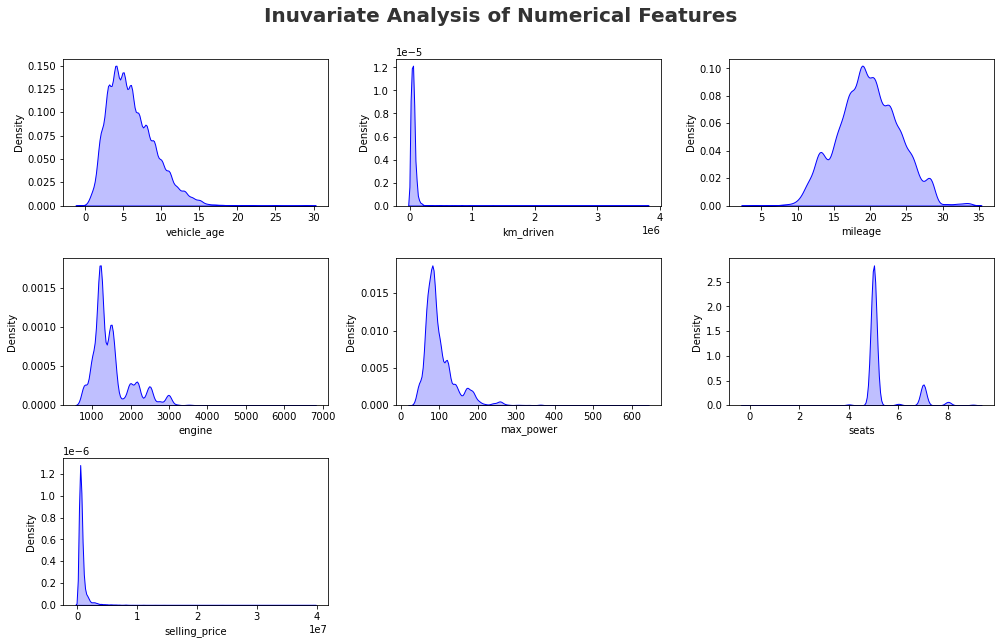

In [47]:
plt.figure(figsize=(14,14))
plt.suptitle('Inuvariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data[numeric_features[i]], shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Report: -

..Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.

..Outliers in km_driven, enginer, selling_price, and max power.

# Categorical Features

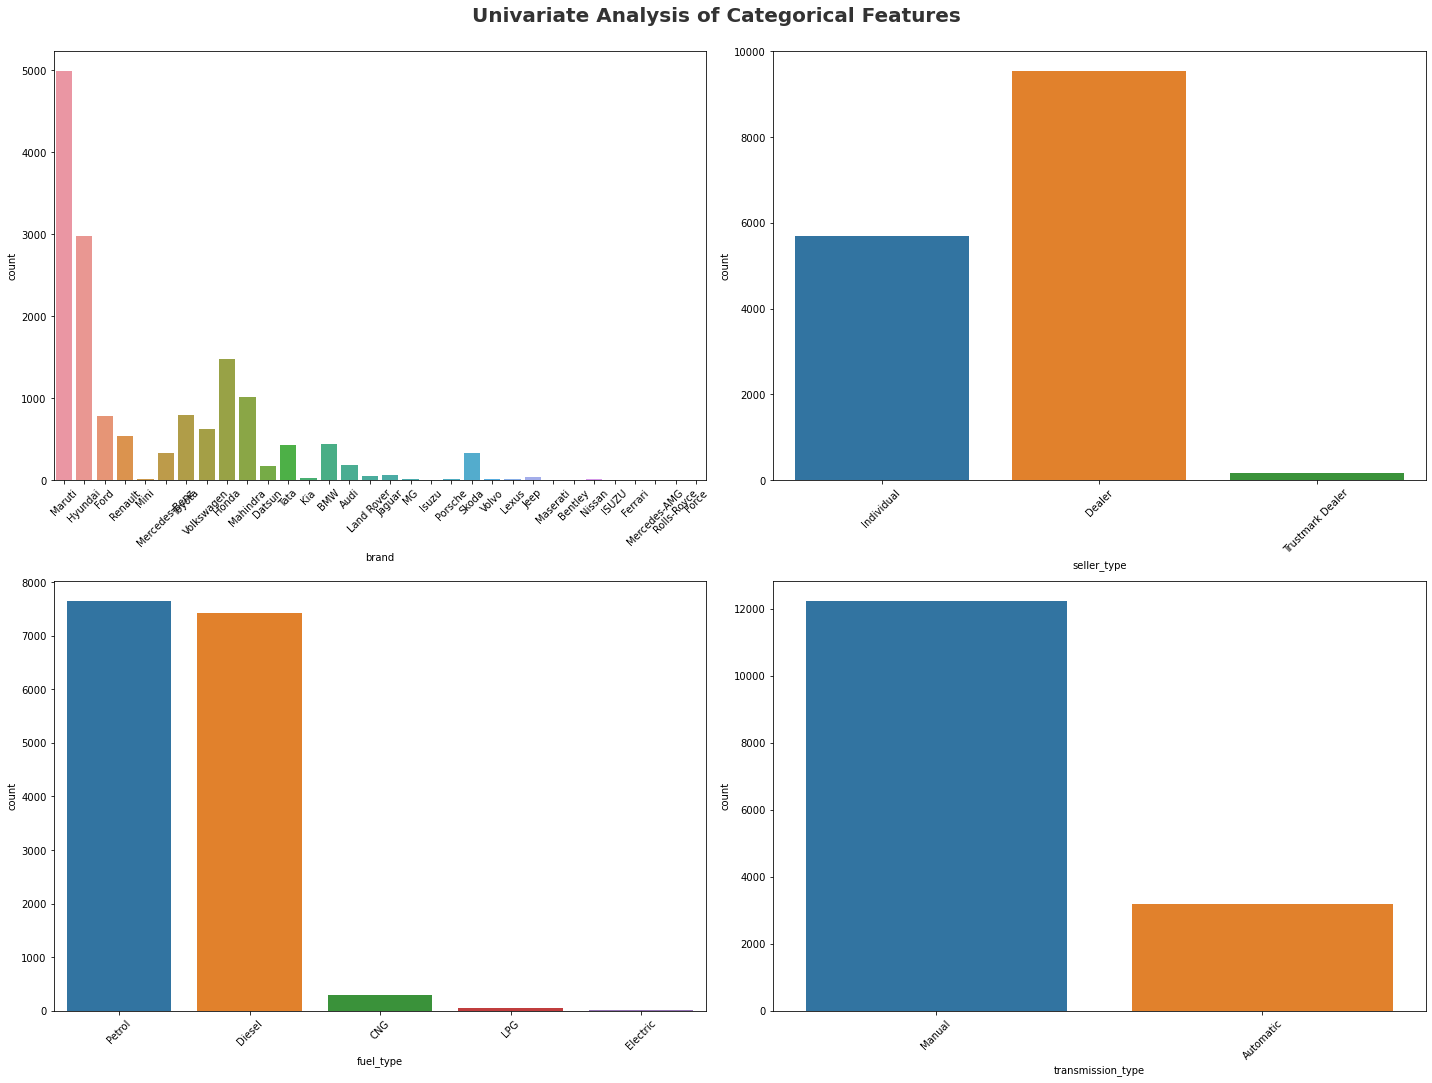

In [48]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


# Multivariate Analysis

. Multivariate analysis is the analysis of more than one variable.

# Check Multicollinearity in Numerical features

In [49]:
data[(list(data.columns)[1:])].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


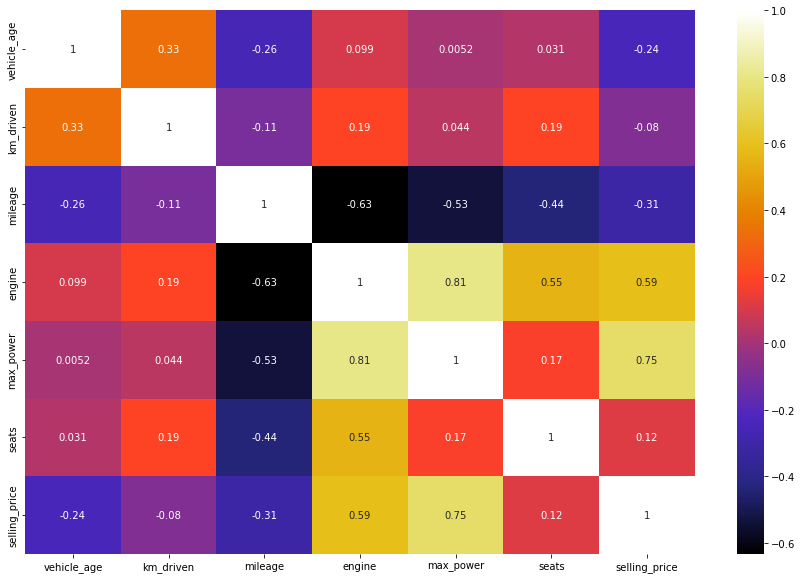

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='CMRmap', annot=True)
plt.show()

Report :-

>Our target column ProdTaken has a weak negative correlation on Age and MontlyIncome.

>The NumberOfFollowups and Passport columns also have a weak positive correlation with ProdTaken.

>The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation.

# Check Multicollinearity for Categorical features

>A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

>A chi-square statistic is one way to show a relationship between two categorical variables.


>Here we test correlation of Categorical columns with Target column i.e Selling Price.

In [54]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(data['selling_price'], data[feature]))[1]<0.05:
        chi2_test.append('Reject null hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,vehicle_age,Reject null hypothesis
1,km_driven,Reject null hypothesis
2,mileage,Reject null hypothesis
3,engine,Reject null hypothesis
4,max_power,Reject null hypothesis
5,seats,Reject null hypothesis
6,selling_price,Reject null hypothesis


# Checking Null Values

In [55]:
data.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [57]:
continues_features=[feature for feature in numeric_features if len(data[feature].unique())>=10]
print('Num of continues features ', continues_features)

Num of continues features  ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


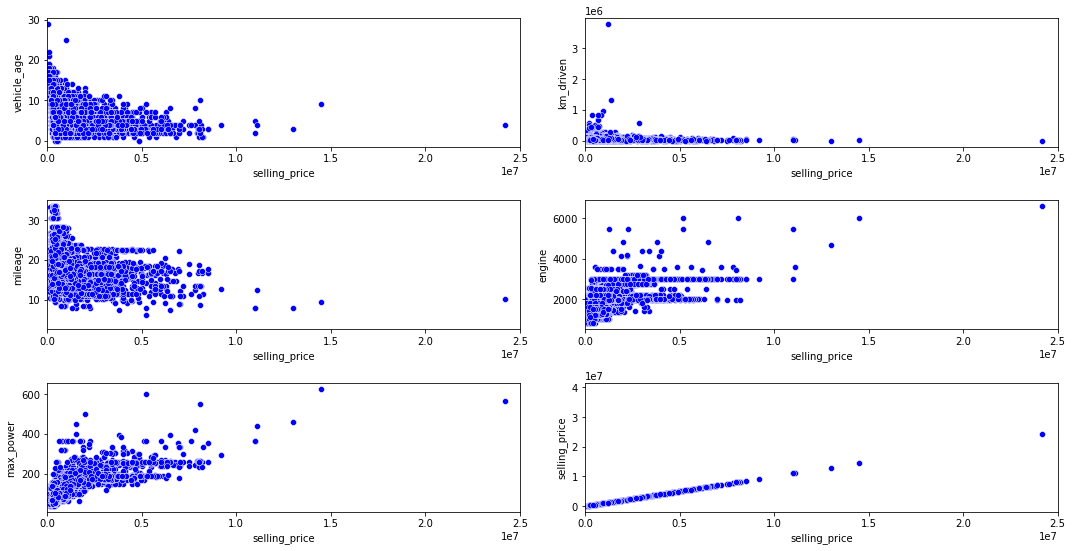

In [61]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= data ,x='selling_price', y=continues_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

# Initial Analysis Report

Report:-

>Lower Vehicle age has more selling price than Vehicle with more age.


>Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.


>Kms Driven has negative effect on selling price.


# 4. Visualization


# 4.1 Visualize the Target Feature

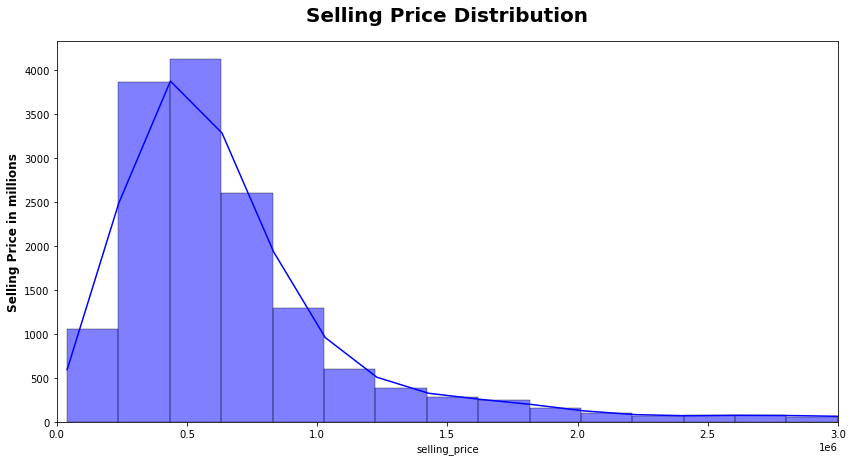

In [65]:
plt.subplots(figsize=(14,7))
sns.histplot(data.selling_price, bins=200,kde=True,color='b')
plt.title('Selling Price Distribution', weight='bold', fontsize=20,pad=20)
plt.ylabel('Count',weight='bold',fontsize=12)
plt.ylabel('Selling Price in millions', weight='bold',fontsize=12)
plt.xlim(0,3000000)
plt.show()

From the chart it is clear that the Target Variable Skewed


# 4.2 Most Selling car in Used car website?

In [66]:
data.car_name.value_counts()[0:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

# Most Selling Used Car is Hyundai i20


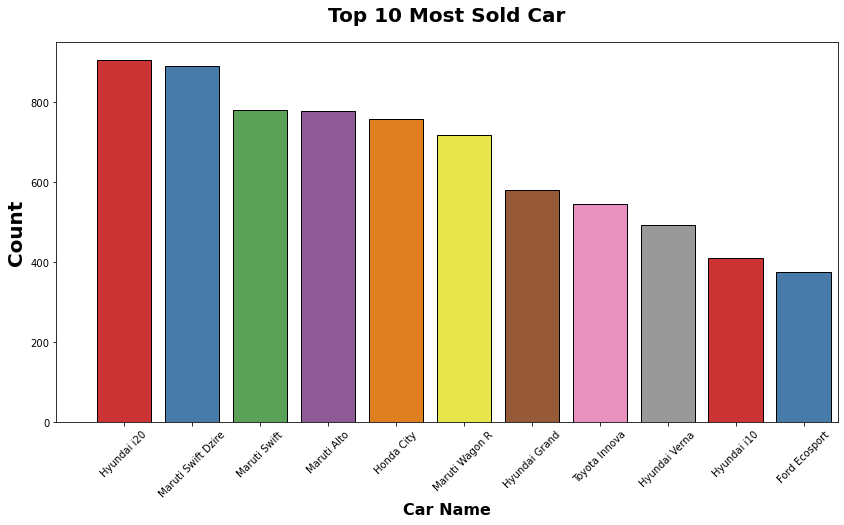

In [68]:
plt.figure(figsize=(14,7))
sns.countplot(x='car_name', data=data, ec='black', palette='Set1', order = data['car_name'].value_counts().index)
plt.title('Top 10 Most Sold Car', weight='bold', fontsize=20, pad=20)
plt.ylabel('Count', weight='bold', fontsize=20)
plt.xlabel('Car Name', weight='bold', fontsize=16)
plt.xticks(rotation=45)
plt.xlim(-1,10.5)
plt.show()


# Check mean price of Hyundai i20 which is most sold


In [69]:
i20 = data[data['car_name']=='Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


Report :

>As per the Chart these are top 10 most selling cars in used car website.


>Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.


>Mean Price of Most Sold Car is 5.4 lakhs.


>This Feature has impact on the Target Variable.


# Most selling brand


In [70]:
data.brand.value_counts()[0:10]

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

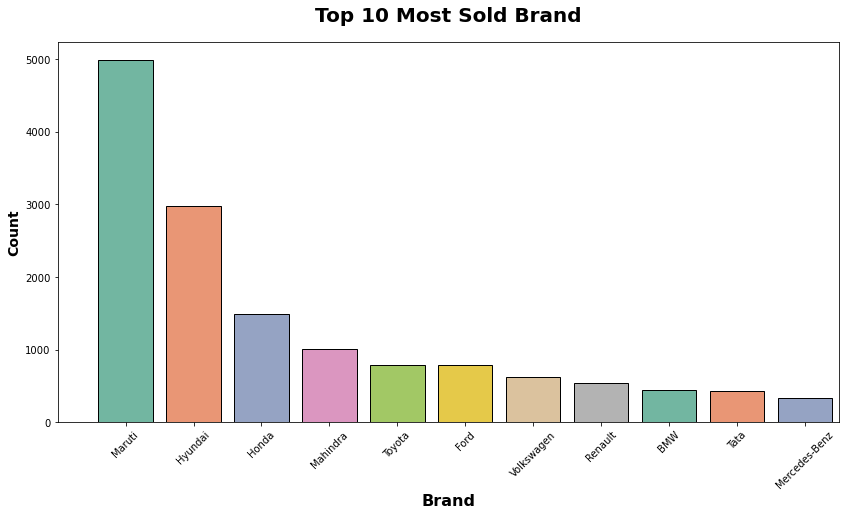

In [74]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=data,ec = "black",palette="Set2",order = data['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

# Check the Mean price of Maruti brand which is most sold


In [76]:
maruti = data[data['brand']=='Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


Report:

>As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.


>Following Maruti we have Hyundai and Honda.


>Mean Price of Maruti Brand is 4.8 lakhs.


# Costliest Brand and Costliest Car


In [77]:
brand = data.groupby('brand').selling_price.max()
brand_data=brand.to_frame().sort_values('selling_price', ascending=False)[0:10]
brand_data

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


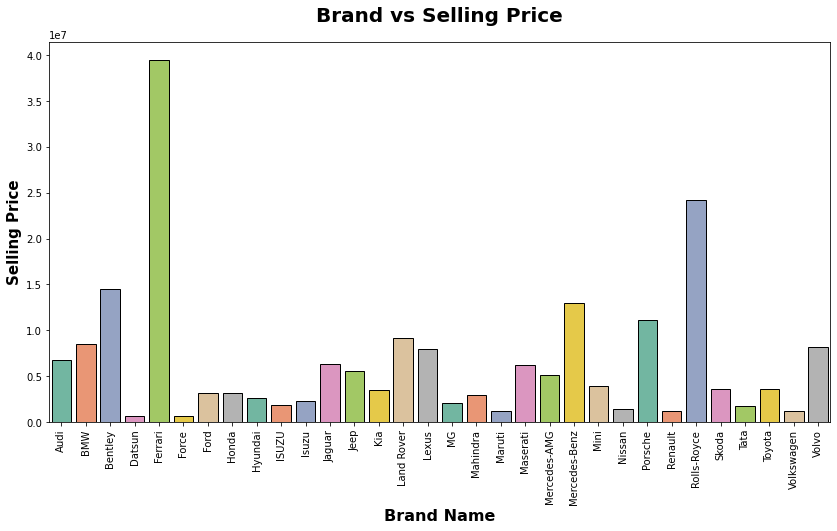

In [78]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set2")
plt.title("Brand vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Report:-

>Costliest Brand sold is Ferrari at 3.95 Crores.


>Second most costliest car Brand is Rolls-Royce as 2.42 Crores.


 >Brand name has very clear impact on selling price.


# Costliest Car


In [80]:
car = data.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[0:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


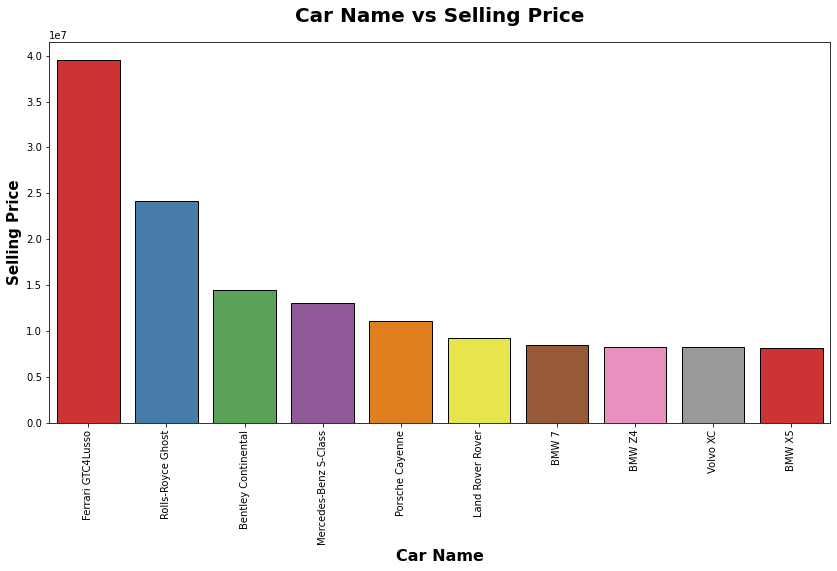

In [81]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Report :-

>Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.


>Ferrari selling price is 3.95 Crs.


>Other than Ferrari other car has priced below 1.5cr.


# Most Mileage Brand and Car Name


In [82]:
mileage = data.groupby('brand')['mileage'].mean().sort_values(ascending=False).head()
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620


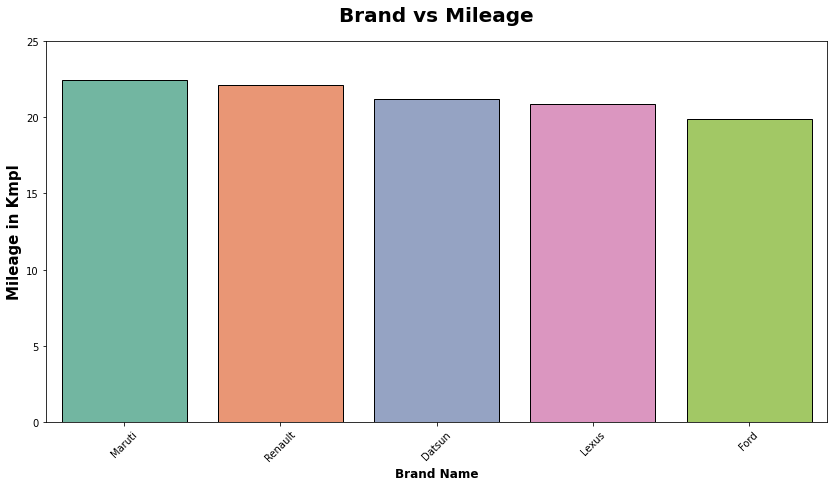

In [83]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

# Car with Highest Mileage


In [84]:
mileage_C= data.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_C.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


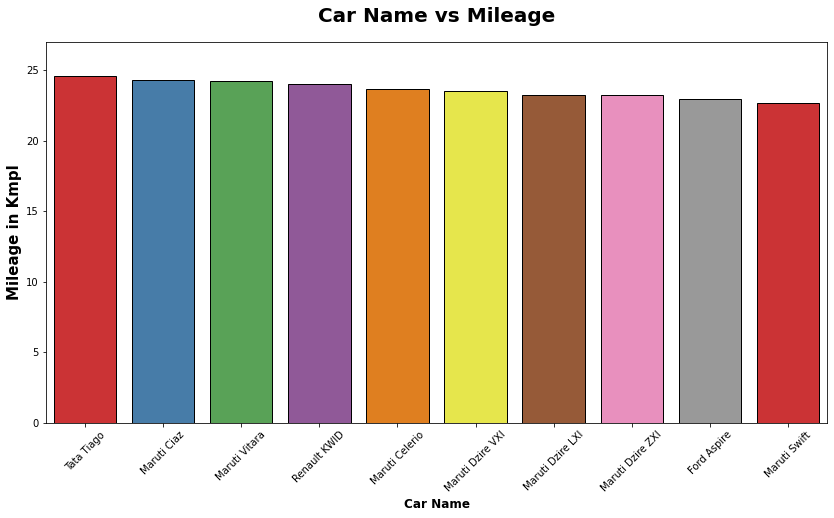

In [85]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_C.index, y=mileage_C.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

# Kilometer driven vs Selling Price


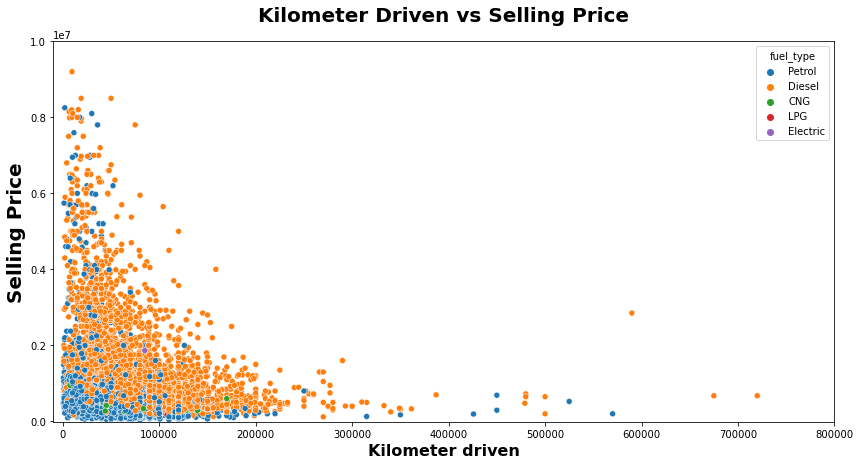

In [87]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=data,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

Report:-

>Many Cars were sold with kms between 0 to 20k Kilometers


>Low Kms driven cars had more selling price compared to cars which had more kms driven.


# Fuel Type Selling Price


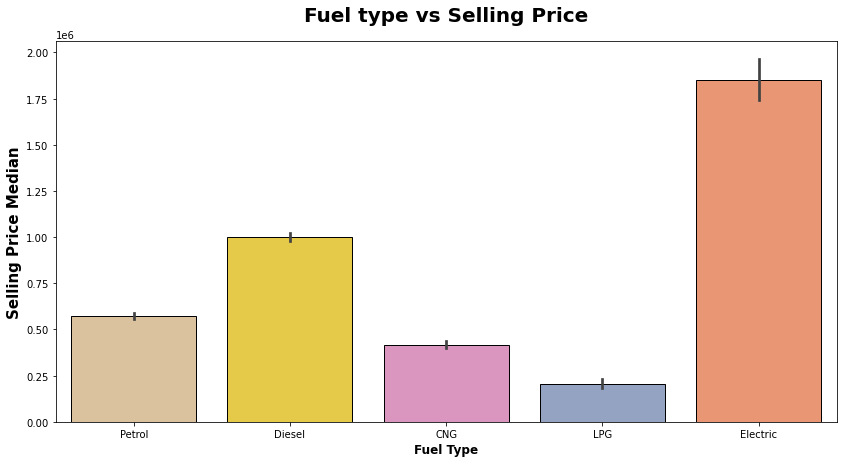

In [88]:
plt.subplots(figsize=(14,7))
sns.barplot(x=data.fuel_type, y=data.selling_price, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

Report:-

>Electric cars have highers selling average price.


>Followed by Diesel and Petrol.


>Fuel Type is also important feature for the Target variable.


# Most sold Fuel type


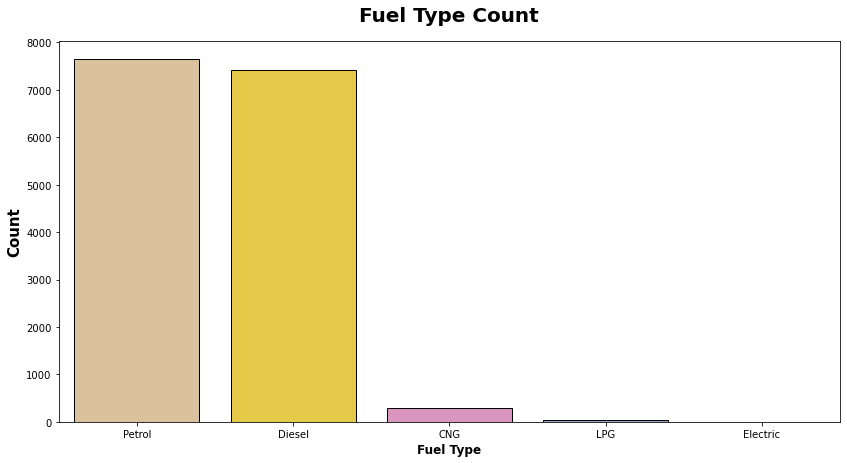

In [89]:
plt.subplots(figsize=(14,7))
sns.countplot(x=data.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

Repoert:-

>Petrol and Diesel dominate the used car market in the website.


>The most sold fuel type Vechicle is Petrol.


>Followed by diesel and CNG and least sold is Electric


# Fuel types available and mileage given


In [90]:
fuel_mileage = data.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


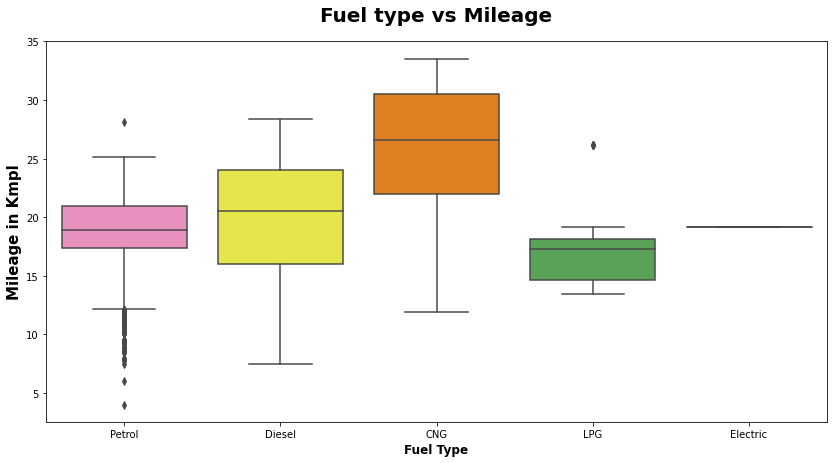

In [91]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=data,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

# Mileage vs Selling Price


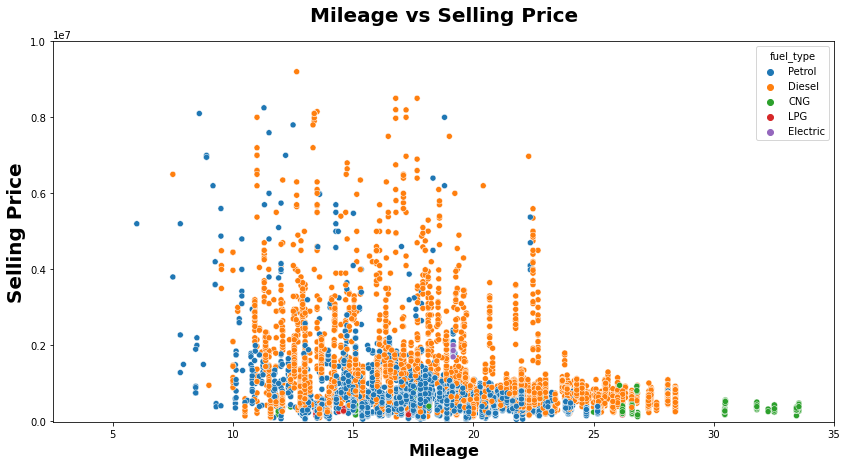

In [92]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=data,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

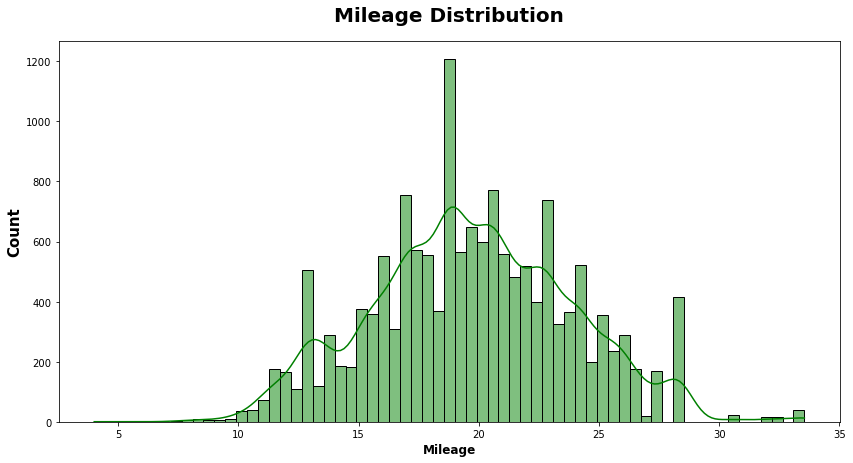

In [93]:
plt.subplots(figsize=(14,7))
sns.histplot(x=data.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

# Vehicle age vs Selling Price


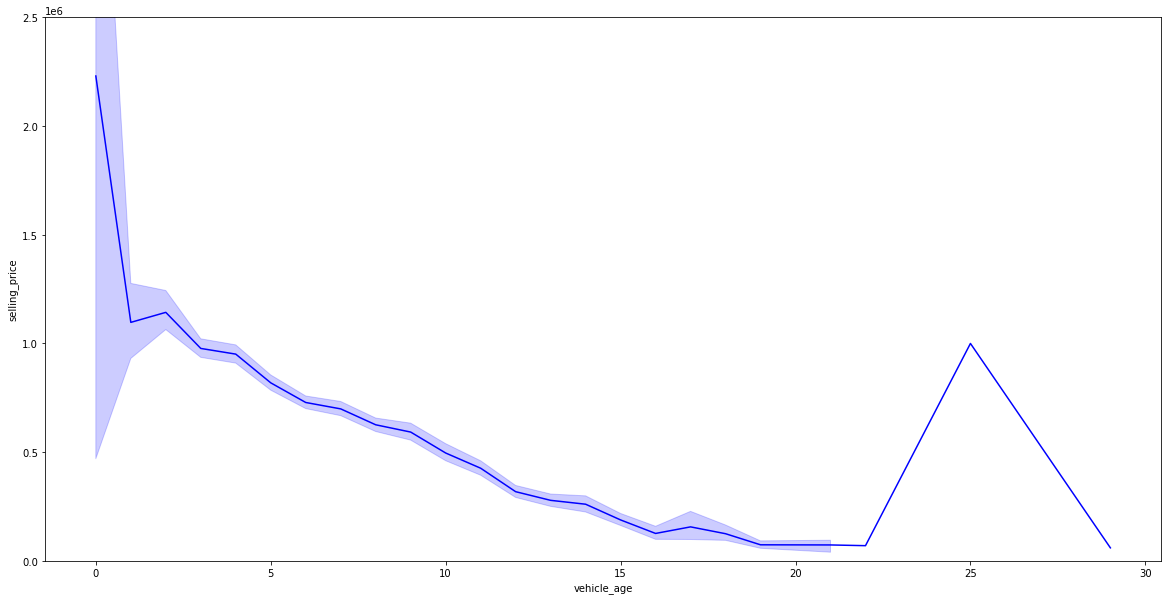

In [94]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=data,color='b')
plt.ylim(0,2500000)
plt.show()

Report :

>As the Vehicle age increases the price also get reduced.


>Vehicle age has Negative impact on selling price


# Vehicle age vs Mileage


In [95]:
vehicle_age = data.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


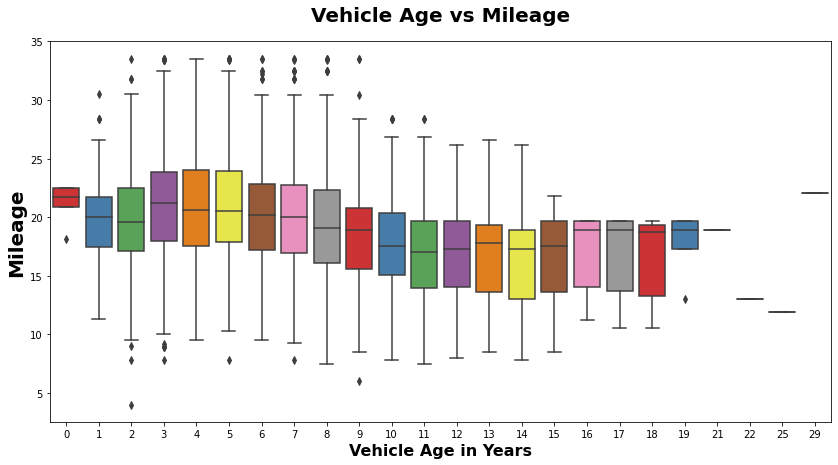

In [96]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=data.vehicle_age, y= data.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

Report :

>As the Age of vehicle increases the median of mileage drops.


>Newer Vehicles have more mileage median older vehicle.


In [97]:
oldest = data.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


Report :

>Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.


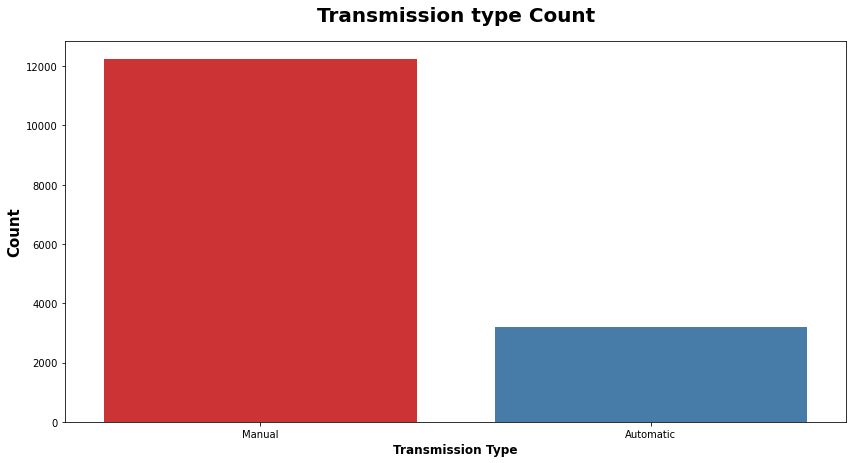

In [98]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=data,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

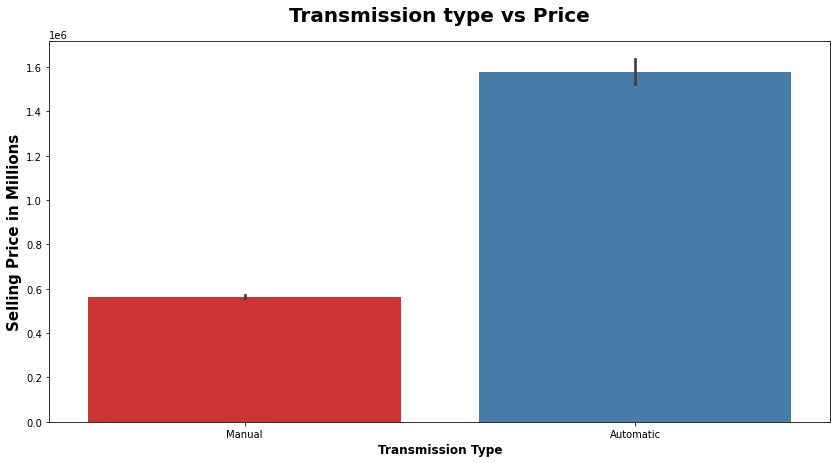

In [99]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=data,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

Report :

>Manual Transmission was found in most of the cars which was sold.


>Automatic cars have more selling price than manual cars.


# Seller Type


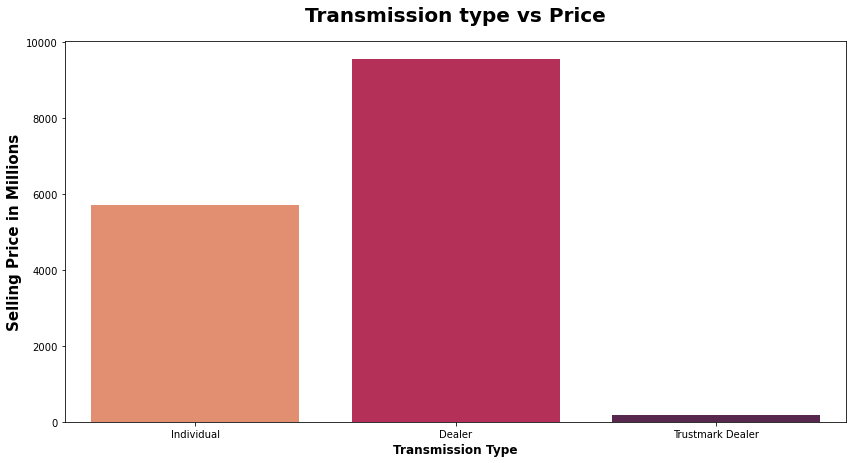

In [100]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=data,palette="rocket_r")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

In [101]:
dealer = data.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


Report :

Dealers have put more ads on used car website.


Dealers have put 9539 ads with median selling price of 5.91 Lakhs.


Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.


Dealers have more median selling price than Individual.


# Final Report


The datatypes and Column names were right and there was 15411 rows and 13 columns


The selling_price column is the target to predict. i.e Regression Problem.


There are outliers in the km_driven, enginer, selling_price, and max power.


Dealers are the highest sellers of the used cars.


Skewness is found in few of the columns will check it after handling outliers.


Vehicle age has negative impact on the price.


Manual cars are mostly sold and automatic has higher selling average than manual cars.


Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.


We just need less data cleaning for this dataset.
